<a href="https://colab.research.google.com/github/aminaalisheva/Word-Embeddings-on-Azerbaijani-dataset/blob/main/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk import download
from nltk.corpus import reuters
from gensim.models import Word2Vec, KeyedVectors
from sklearn.model_selection import train_test_split

download('reuters')

[nltk_data] Downloading package reuters to /home/jafar/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [ ]:
from datasets import load_dataset

ds = load_dataset("allmalab/aze-books")
docs = list(ds["train"]["text"])[:]

/home/jafar/ada/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Task 1: Dataset Analysis & Matrix Visualization

# data = pd.read_csv("../books_dataset.csv")
# docs = data["text"].to_list()
vectorizer = CountVectorizer(min_df = 5)
X_term_doc = vectorizer.fit_transform(docs)

In [ ]:
X_term_doc.shape

(3602, 553395)

In [ ]:
# Statistics
vocab = vectorizer.get_feature_names_out()
word_counts = np.asarray(X_term_doc.sum(axis=0)).flatten()

print(f'Dataset size: {len(docs)} documents')
print(f'Number of distinct words: {len(vocab)}')

freq_threshold = 100
frequent_words = np.sum(word_counts >= freq_threshold)
rare_words = np.sum(word_counts < freq_threshold)

print(f'Frequent words (≥ {freq_threshold} occurrences): {frequent_words}')
print(f'Rare words (< {freq_threshold} occurrences): {rare_words}')

Dataset size: 3602 documents
Number of distinct words: 553395
Frequent words (≥ 100 occurrences): 98097
Rare words (< 100 occurrences): 455298


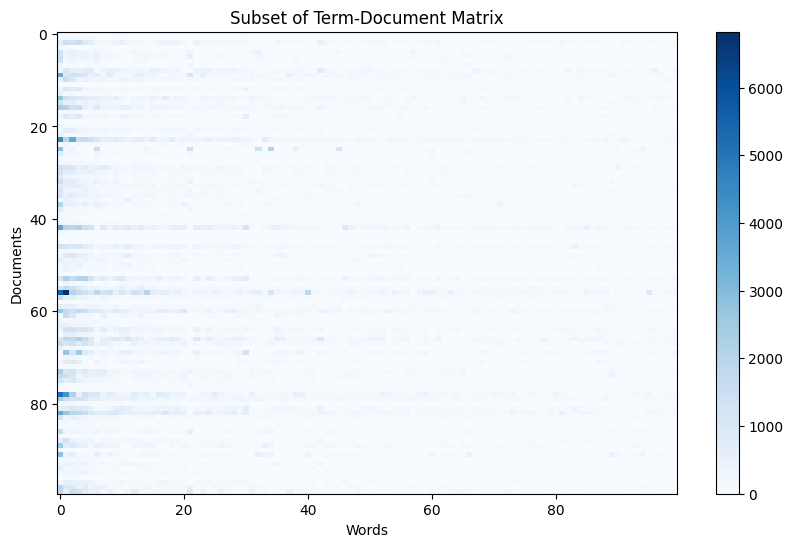

In [ ]:
subset_docs = 100  # e.g., first 500 documents
subset_words = 100  # e.g., first 1000 words
sorted_subset = X_sorted[:subset_docs, :subset_words]
plt.figure(figsize=(10,6))
plt.imshow(sorted_subset.toarray(), cmap='Blues', aspect='auto')
plt.title('Subset of Term-Document Matrix')
plt.xlabel('Words')
plt.ylabel('Documents')
plt.colorbar()
plt.show()

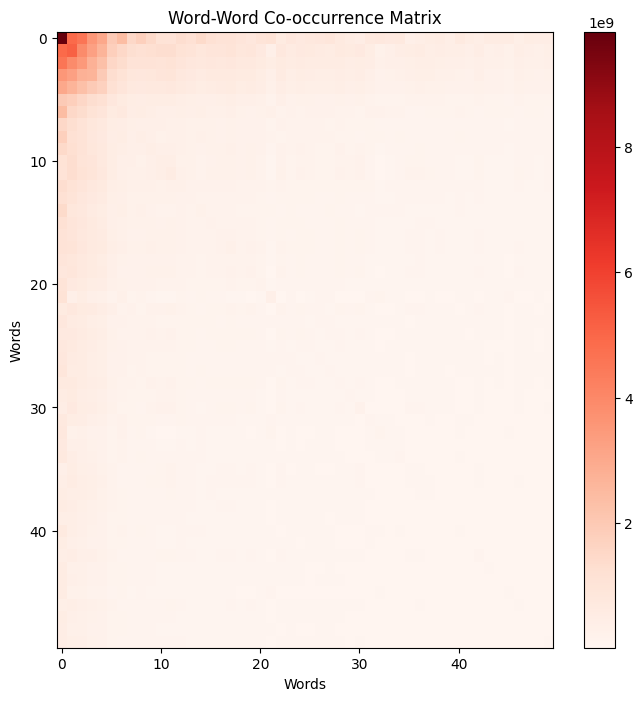

In [ ]:
# Word-Word Co-occurrence Matrix
# subset_docs = 10000  # e.g., first 500 documents
subset_words = 50  # e.g., first 1000 words
sorted_subset = X_sorted[:, :subset_words]
X_word_word = (sorted_subset.T @ sorted_subset)
np.fill_diagonal(X_word_word.toarray(), 0)

plt.figure(figsize=(8,8))
plt.imshow(X_word_word.toarray(), cmap='Reds', aspect='auto')
plt.title('Word-Word Co-occurrence Matrix')
plt.xlabel('Words')
plt.ylabel('Words')
plt.colorbar()
plt.show()

In [ ]:
# Task 2: Word2Vec
sentences = [re.findall(r'\b\w+\b', doc.lower()) for doc in docs]
w2v_model = Word2Vec(sentences, vector_size=16, window=5, min_count=3, workers=4)
w2v_model.save("word2vec3.model")

In [ ]:
w2v_model = Word2Vec.load("../word2vec3.model")

In [ ]:
synonyms

['investisiya', 'investisiyaların', 'energetika', 'məşğulluq', 'azaldılması']

In [ ]:
words_test = ['bank', 'bazar', 'pul', 'ticarət', 'səhm', 'qızıl', 'inkişaf', 'qiymət', 'sərmayə', 'valyuta']
for word in words_test:
    synonyms = w2v_model.wv.most_similar(word, topn=5)
    synonyms = [i[0] for i in synonyms]
    print(f"{word}:", synonyms)

bank: ['sığorta', 'kredit', 'büdcə', 'nizamnamə', 'müəssisənin']
bazar: ['75,6', 'allahqulu!', 'böhran', 'ölkəmiz', 'önümüzə']
pul: ['maaş', 'pulun', 'pulu', 'məvacib', 'pulla']
ticarət: ['gəmiçiliyi,', 'gəmiçilik', 'ticarəti', 'turistlər', 'i̇stixanada']
səhm: ['broker', '3.2.', 'ödəmələr,', 'ədv', 'vəsait,']
qızıl: ['gümüş', 'vilkoksun', 'ağadı,', 'gəlinlik', 'döyüşçü:']
inkişaf: ['inteqrasiya', '2009–2013-cü', 'tənəzzül', 'inkşaf', 'kişaf']
qiymət: ['önəm', 'məsləhətlər', 'avab', 'zəmanət', 'qiymətini']
sərmayə: ['investisiya', 'investisiyalar', 'vəsait', 'dərinləşməsini', 'inflyasiya']
valyuta: ['investisiya', 'investisiyaların', 'energetika', 'məşğulluq', 'azaldılması']


In [ ]:
# Example vector arithmetic
print('Vector arithmetic: bank - money + gold')
print(w2v_model.wv.most_similar(positive=['патша', 'әйелдер'], negative=['адам']))

Vector arithmetic: bank - money + gold
[('қуып', 0.9993326663970947), ('күліп', 0.999276876449585), ('ұшып', 0.9992708563804626), ('жол', 0.9992263317108154), ('ат', 0.9992200136184692), ('қызыл', 0.9992175102233887), ('байлап', 0.9992127418518066), ('отырған', 0.999208390712738), ('таң', 0.9992068409919739), ('ауылға', 0.9992051720619202)]
